<a href="https://colab.research.google.com/github/AhmadMuhamadSolihin/Machine-Learning/blob/main/Hology_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALL LIBRARY

In [ ]:
!pip install gdown

# LIBRARY UMUM

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import gdown

# DATA

In [ ]:
folder_id = '1TbHce2SU-W_Fr2hMjN9E_WhC_1R9M182'
url = f"https://drive.google.com/uc?id={folder_id}&export=download"

output = 'data.zip'

gdown.download(url, output, quiet=False)

import zipfile
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall()

Downloading...
From: https://drive.google.com/uc?id=1TbHce2SU-W_Fr2hMjN9E_WhC_1R9M182&export=download
To: /content/data.zip
100%|██████████| 10.2M/10.2M [00:00<00:00, 39.9MB/s]


## Dataframe

In [ ]:
data = pd.read_csv('Penyisihan Hology Data Mining/train.csv')
data.head()

,id,jenis,warna
0,1,1,1
1,2,0,2
2,3,1,3
3,4,1,1
4,5,0,4


#FUNGSI

In [ ]:
def show_image(gambar):
  plt.imshow(gambar.astype('uint8'))
  plt.axis('Off')
  plt.show()

In [ ]:
def load_gambar_jenis(path_gambar, size_x, size_y):
    target_size = (size_x, size_y)  # Ukuran target (width, height)

    gambars = []
    labels = []

    file_list = os.listdir(path_gambar)

    for filename in file_list:
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            path_gambar1 = os.path.join(path_gambar, filename)
            gambar = tf.keras.preprocessing.image.load_img(path_gambar1, target_size=target_size)
            gambar_array = tf.keras.preprocessing.image.img_to_array(gambar)
            gambars.append(gambar_array)
            nilai_label = data['jenis'][data['id'] == int(filename.split('.')[0])]
            labels.append(nilai_label)

    gambar_array = np.array(gambars)
    return gambar_array, labels

In [ ]:
def load_gambar_warna(path_gambar, size_x, size_y, train=True):
    target_size = (size_x, size_y)  # Ukuran target (width, height)

    gambars = []
    labels = []

    file_list = os.listdir(path_gambar)

    for filename in file_list:
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            path_gambar1 = os.path.join(path_gambar, filename)
            gambar = tf.keras.preprocessing.image.load_img(path_gambar1, target_size=target_size)
            gambar_array = tf.keras.preprocessing.image.img_to_array(gambar)
            gambars.append(gambar_array)
            nilai_label = data['warna'][data['id'] == int(filename.split('.')[0])]
            labels.append(nilai_label)

    gambar_array = np.array(gambars)
    return gambar_array, labels

In [ ]:
def load_gambar_test(path_gambar, size_x, size_y):
    target_size = (size_x, size_y)  # Ukuran target (width, height)

    gambars = []
    labels = []

    file_list = os.listdir(path_gambar)

    for filename in file_list:
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            path_gambar1 = os.path.join(path_gambar, filename)
            gambar = tf.keras.preprocessing.image.load_img(path_gambar1, target_size=target_size)
            gambar_array = tf.keras.preprocessing.image.img_to_array(gambar)
            gambars.append(gambar_array)
            labels.append(int(filename.split('.')[0]))

    gambar_array = np.array(gambars)
    return gambar_array, labels

#LOAD DATA

In [ ]:
gambar_jenis, label_jenis =load_gambar_jenis("Penyisihan Hology Data Mining/train/", 128, 128)

In [ ]:
gambar_warna, label_warna =load_gambar_warna("Penyisihan Hology Data Mining/train/", 64, 64)

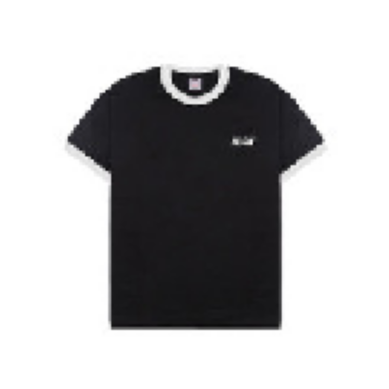

638    0
Name: jenis, dtype: int64


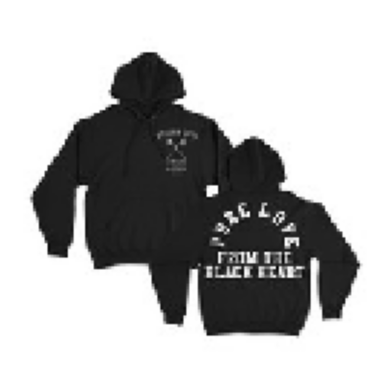

37    1
Name: jenis, dtype: int64


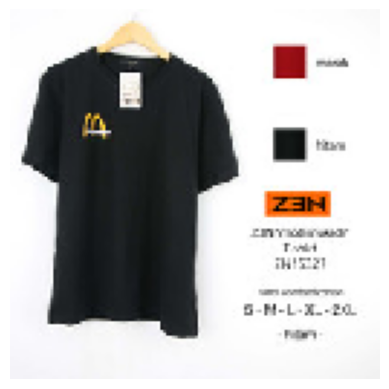

697    0
Name: jenis, dtype: int64


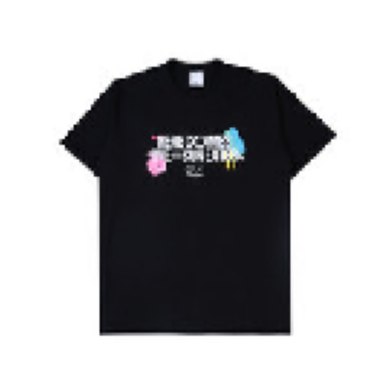

396    0
Name: jenis, dtype: int64


In [ ]:
for i in range(0,4):
  show_image(gambar_jenis[i])
  print(label_jenis[i])

#PREPROCESSING

##Rescale Data

In [ ]:
gambar_jenis = gambar_jenis.astype('float32') / 255.0
gambar_warna = gambar_warna.astype('float32') / 255.0


##Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

num_classes = 2
label_encoder = LabelEncoder()
jenis_encoded = label_encoder.fit_transform(label_jenis)
jenis_categorical = to_categorical(jenis_encoded, num_classes)
print(jenis_categorical)

num_classes = 5
label_encoder = LabelEncoder()
warna_encoded = label_encoder.fit_transform(label_warna)
warna_categorical = to_categorical(warna_encoded, num_classes)
warna_categorical
print(warna_categorical)

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Membagi Data Train dan Test

In [ ]:
from sklearn.model_selection import train_test_split

X_train_jenis, X_test_jenis, y_train_jenis, y_test_jenis = train_test_split(gambar_jenis, jenis_categorical, test_size=0.2, random_state=42)

print(f'Bentuk X_train: {X_train_jenis.shape}')
print(f'Bentuk y_train: {y_train_jenis.shape}')
print(f'Bentuk X_test: {X_test_jenis.shape}')
print(f'Bentuk y_test: {y_test_jenis.shape}')

Bentuk X_train: (621, 128, 128, 3)
Bentuk y_train: (621, 2)
Bentuk X_test: (156, 128, 128, 3)
Bentuk y_test: (156, 2)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_warna, X_test_warna, y_train_warna, y_test_warna = train_test_split(gambar_warna, warna_categorical, test_size=0.2, random_state=42)

print(f'Bentuk X_train: {X_train_warna.shape}')
print(f'Bentuk y_train: {y_train_warna.shape}')
print(f'Bentuk X_test: {X_test_warna.shape}')
print(f'Bentuk y_test: {y_test_warna.shape}')

Bentuk X_train: (621, 64, 64, 3)
Bentuk y_train: (621, 5)
Bentuk X_test: (156, 64, 64, 3)
Bentuk y_test: (156, 5)


#MODELING

##Optimization


In [ ]:
pip install optuna

In [ ]:
import optuna
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input

In [ ]:
def objective_rf(trial, data):
    size_x =64
    size_y = size_x
    size_z = 3
    num_classes = 2


    gambar_jenis, label_jenis = load_gambar_jenis("Penyisihan Hology Data Mining/train/", size_x, size_y)

    X = gambar_jenis.astype('float32') / 255.0

    label_encoder = LabelEncoder()
    jenis_encoded = label_encoder.fit_transform(label_jenis)
    y = to_categorical(jenis_encoded, num_classes)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    layers = trial.suggest_int('n_layers', 1, 3)
    filter = []
    for i in range(0, layers):
        filter.append(trial.suggest_int(f'n_filter_{i}', 16, 64))

    cnn = Sequential()
    cnn.add(Input(shape=(size_x, size_y, size_z)))
    for i in range(0, layers):
        cnn.add(Conv2D(filter[i], (3, 3), padding='same', activation='relu')),
        cnn.add(MaxPooling2D(pool_size=(2, 2))),
    cnn.add(Flatten())

    X_train_feature = cnn.predict(X_train, verbose=0)
    X_test_feature = cnn.predict(X_test, verbose=0)

    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 3)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 3)
    max_features = 'sqrt'
    bootstrap = True
    oob_score = False
    random_state = 25

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        oob_score=oob_score,
        random_state=random_state
    )

    model.fit(X_train_feature, y_train)

    y_pred = model.predict(X_test_feature)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    test_acc = accuracy_score(y_true, y_pred)

    return test_acc

In [ ]:
def objective_rf_warna(trial, data):
    size_x = 128
    size_y = size_x
    size_z = 3
    num_classes = 5


    gambar_warna, label_warna = load_gambar_warna("Penyisihan Hology Data Mining/train/", size_x, size_y)

    X = gambar_warna.astype('float32') / 255.0

    label_encoder = LabelEncoder()
    jenis_encoded = label_encoder.fit_transform(label_warna)
    y = to_categorical(jenis_encoded, num_classes)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    layers = trial.suggest_int('n_layers', 1, 3)
    filter = []
    for i in range(0, layers):
        filter.append(trial.suggest_int(f'n_filter_{i}', 16, 64))

    cnn = Sequential()
    cnn.add(Input(shape=(size_x, size_y, size_z)))
    for i in range(0, layers):
        cnn.add(Conv2D(filter[i], (3, 3), padding='same', activation='relu')),
        cnn.add(MaxPooling2D(pool_size=(2, 2))),
    cnn.add(Flatten())

    X_train_feature = cnn.predict(X_train, verbose=0)
    X_test_feature = cnn.predict(X_test, verbose=0)

    n_estimators = trial.suggest_int('n_estimators', 100, 200)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 5, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 3)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 3)
    max_features = 'sqrt'
    bootstrap = True
    oob_score = False
    random_state = 25

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        oob_score=oob_score,
        random_state=random_state
    )

    model.fit(X_train_feature, y_train)

    y_pred = model.predict(X_test_feature)
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(y_test, axis=1)

    test_acc = accuracy_score(y_true, y_pred)

    return test_acc

In [ ]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(lambda trial: objective_rf(trial, data), n_trials=100)
print("Best hyperparameters: ", study_rf.best_params)
print("Best MSE: ", study_rf.best_value)

In [ ]:
study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(lambda trial: objective_rf_warna(trial, data), n_trials=100)
print("Best hyperparameters: ", study_rf.best_params)
print("Best MSE: ", study_rf.best_value)

##CNN-RF (jenis)


In [ ]:
model_cnn_jenis = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(28, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(57, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(62, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
])

In [ ]:
model_cnn_jenis.summary()

Model: "sequential_200"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_475 (Conv2D)                  │ (None, 128, 128, 28)        │             784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_475 (MaxPooling2D)     │ (None, 64, 64, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_476 (Conv2D)                  │ (None, 64, 64, 57)          │          14,421 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_476 (MaxPooling2D)     │ (None, 32, 32, 57)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_477 (Conv2D)                  │ (None, 32, 32, 62)          │          31,868 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_477 (MaxPooling2D)     │ (None, 16, 16, 62)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_200 (Flatten)                │ (None, 15872)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,073 (183.88 KB)

 Trainable params: 47,073 (183.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_features_train_jenis = model_cnn_jenis.predict(X_train_jenis)
X_features_test_jenis = model_cnn_jenis.predict(X_test_jenis)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model_jenis = RandomForestClassifier(n_estimators=165,
    criterion='gini',
    max_depth=13,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    oob_score=False,
    random_state=25)
rf_model_jenis.fit(X_features_train_jenis, y_train_jenis)

y_pred_jenis = rf_model_jenis.predict(X_features_test_jenis)
accuracy_jenis = accuracy_score(y_test_jenis, y_pred_jenis)
print(f'Accuracy: {accuracy_jenis}')

Accuracy: 0.8589743589743589


##CNN-RF (warna)

In [ ]:
model_cnn_warna = keras.Sequential([
    layers.Input(shape=(64, 64, 3)),
    layers.Conv2D(54, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
])

In [ ]:
model_cnn_warna.summary()

Model: "sequential_201"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_478 (Conv2D)                  │ (None, 64, 64, 54)          │           1,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_478 (MaxPooling2D)     │ (None, 32, 32, 54)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_201 (Flatten)                │ (None, 55296)               │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,512 (5.91 KB)

 Trainable params: 1,512 (5.91 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_features_train_warna = model_cnn_warna.predict(X_train_warna)
X_features_test_warna = model_cnn_warna.predict(X_test_warna)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [ ]:
rf_model_warna = RandomForestClassifier(n_estimators=182,
                                        criterion='entropy',
                                        max_depth=11,
                                        min_samples_split=2,
                                        min_samples_leaf=2,
                                        max_features='sqrt',
                                        bootstrap=True,
                                        oob_score=False,
                                        random_state=25)
rf_model_warna.fit(X_features_train_warna, y_train_warna)

y_pred_proba = rf_model_warna.predict_proba(X_features_test_warna)
n  = np.array(y_pred_proba)
new = []
for j in range(156):
  for i in range(5):
    new.append(n[i][:,1][j])
new1 = np.array(new)
new2 = new1.reshape(-1,5)
argmax = np.argmax(new2, axis=1)

num_classes = 5
label_encoder = LabelEncoder()
warna_encoded = label_encoder.fit_transform(argmax)
y_pred_warna_fix = to_categorical(warna_encoded, num_classes)

accuracy_warna = accuracy_score(y_test_warna, y_pred_warna_fix)
print(f'Accuracy: {accuracy_warna}')

Accuracy: 0.9166666666666666


#DEPLOYMENT

In [ ]:
gambar_jenis_1, label_jenis_1 =load_gambar_test("Penyisihan Hology Data Mining/test/", 128, 128)

gambar_jenis_1 = gambar_jenis_1.astype('float32') / 255.0

features_jenis_1 = model_cnn_jenis.predict(gambar_jenis_1)
prediksi_jenis_1 = rf_model_jenis.predict(features_jenis_1)
prediksi_jenis_1 = np.argmax(prediksi_jenis_1, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [ ]:
gambar_warna_1, label_warna_1 =load_gambar_test("Penyisihan Hology Data Mining/test/", 64, 64)

gambar_warna_1 = gambar_warna_1.astype('float32') / 255.0

features_warna_1 = model_cnn_warna.predict(gambar_warna_1)
prediksi_warna_1 = rf_model_warna.predict_proba(features_warna_1)
n  = np.array(prediksi_warna_1)
new = []
for j in range(334):
  for i in range(5):
    new.append(n[i][:,1][j])
new1 = np.array(new)
new2 = new1.reshape(-1,5)
argmax = np.argmax(new2, axis=1)

num_classes = 5
label_encoder = LabelEncoder()
warna_encoded = label_encoder.fit_transform(argmax)
prediksi_warna_1 = to_categorical(warna_encoded, num_classes)
prediksi_warna_1 = np.argmax(prediksi_warna_1, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [ ]:
hasil = {
    'id_jenis': label_jenis_1,
    'jenis': prediksi_jenis_1,
    'id_warna': label_warna_1,
    'warna': prediksi_warna_1
}

hasil = pd.DataFrame(hasil)

In [ ]:
if (hasil['id_jenis'] == hasil['id_warna']).all():
    hasil = hasil.drop(columns=['id_warna'])
    hasil = hasil.rename(columns={'id_jenis': 'id'})
else:
    print("The columns have different values and cannot be combined by dropping one.")

In [ ]:
hasil_sorted = hasil.sort_values(by='id')
print(hasil_sorted)

       id  jenis  warna
170   778      0      3
222   779      1      3
230   780      1      2
67    781      0      1
99    782      1      3
..    ...    ...    ...
284  1107      0      0
190  1108      1      4
45   1109      0      2
109  1110      0      3
47   1111      1      0

[334 rows x 3 columns]


In [ ]:
hasil_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 170 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      334 non-null    int64
 1   jenis   334 non-null    int64
 2   warna   334 non-null    int64
dtypes: int64(3)
memory usage: 10.4 KB


In [ ]:
hasil_sorted.to_csv('hasil_sample_submission_5.csv', index=False)